In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import numpy as np
import random
import os
import warnings
import matplotlib.pyplot as plt
import cv2
np.random.seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
warnings.filterwarnings("ignore")

In [2]:
class CFG:
    dataset_path = "/kaggle/working/dataset_train/pseud_ashcolor_4label/"
    pseudo_label_path = f"{dataset_path}/labels/iter_0/"
    pseudo_model_path = "/kaggle/working/notebook/experiment/v2/model20/model20/model20.pth"


pd.set_option('display.max_rows', 500)
pd.options.display.max_colwidth = 300


In [3]:
train_df = pd.read_csv(f"{CFG.dataset_path}/train_df.csv")
valid_df = pd.read_csv(f"{CFG.dataset_path}/validation_df.csv")

fill_path = CFG.pseudo_label_path + train_df["record_id"].astype("str") + "_"+train_df["time"].astype("str")+".npy"
train_df["label_path"] = train_df["label_path"].fillna(fill_path)
valid_df = valid_df.dropna()

# train_df.shape, valid_df.shape

In [4]:
record_ids=np.unique(train_df["record_id"])

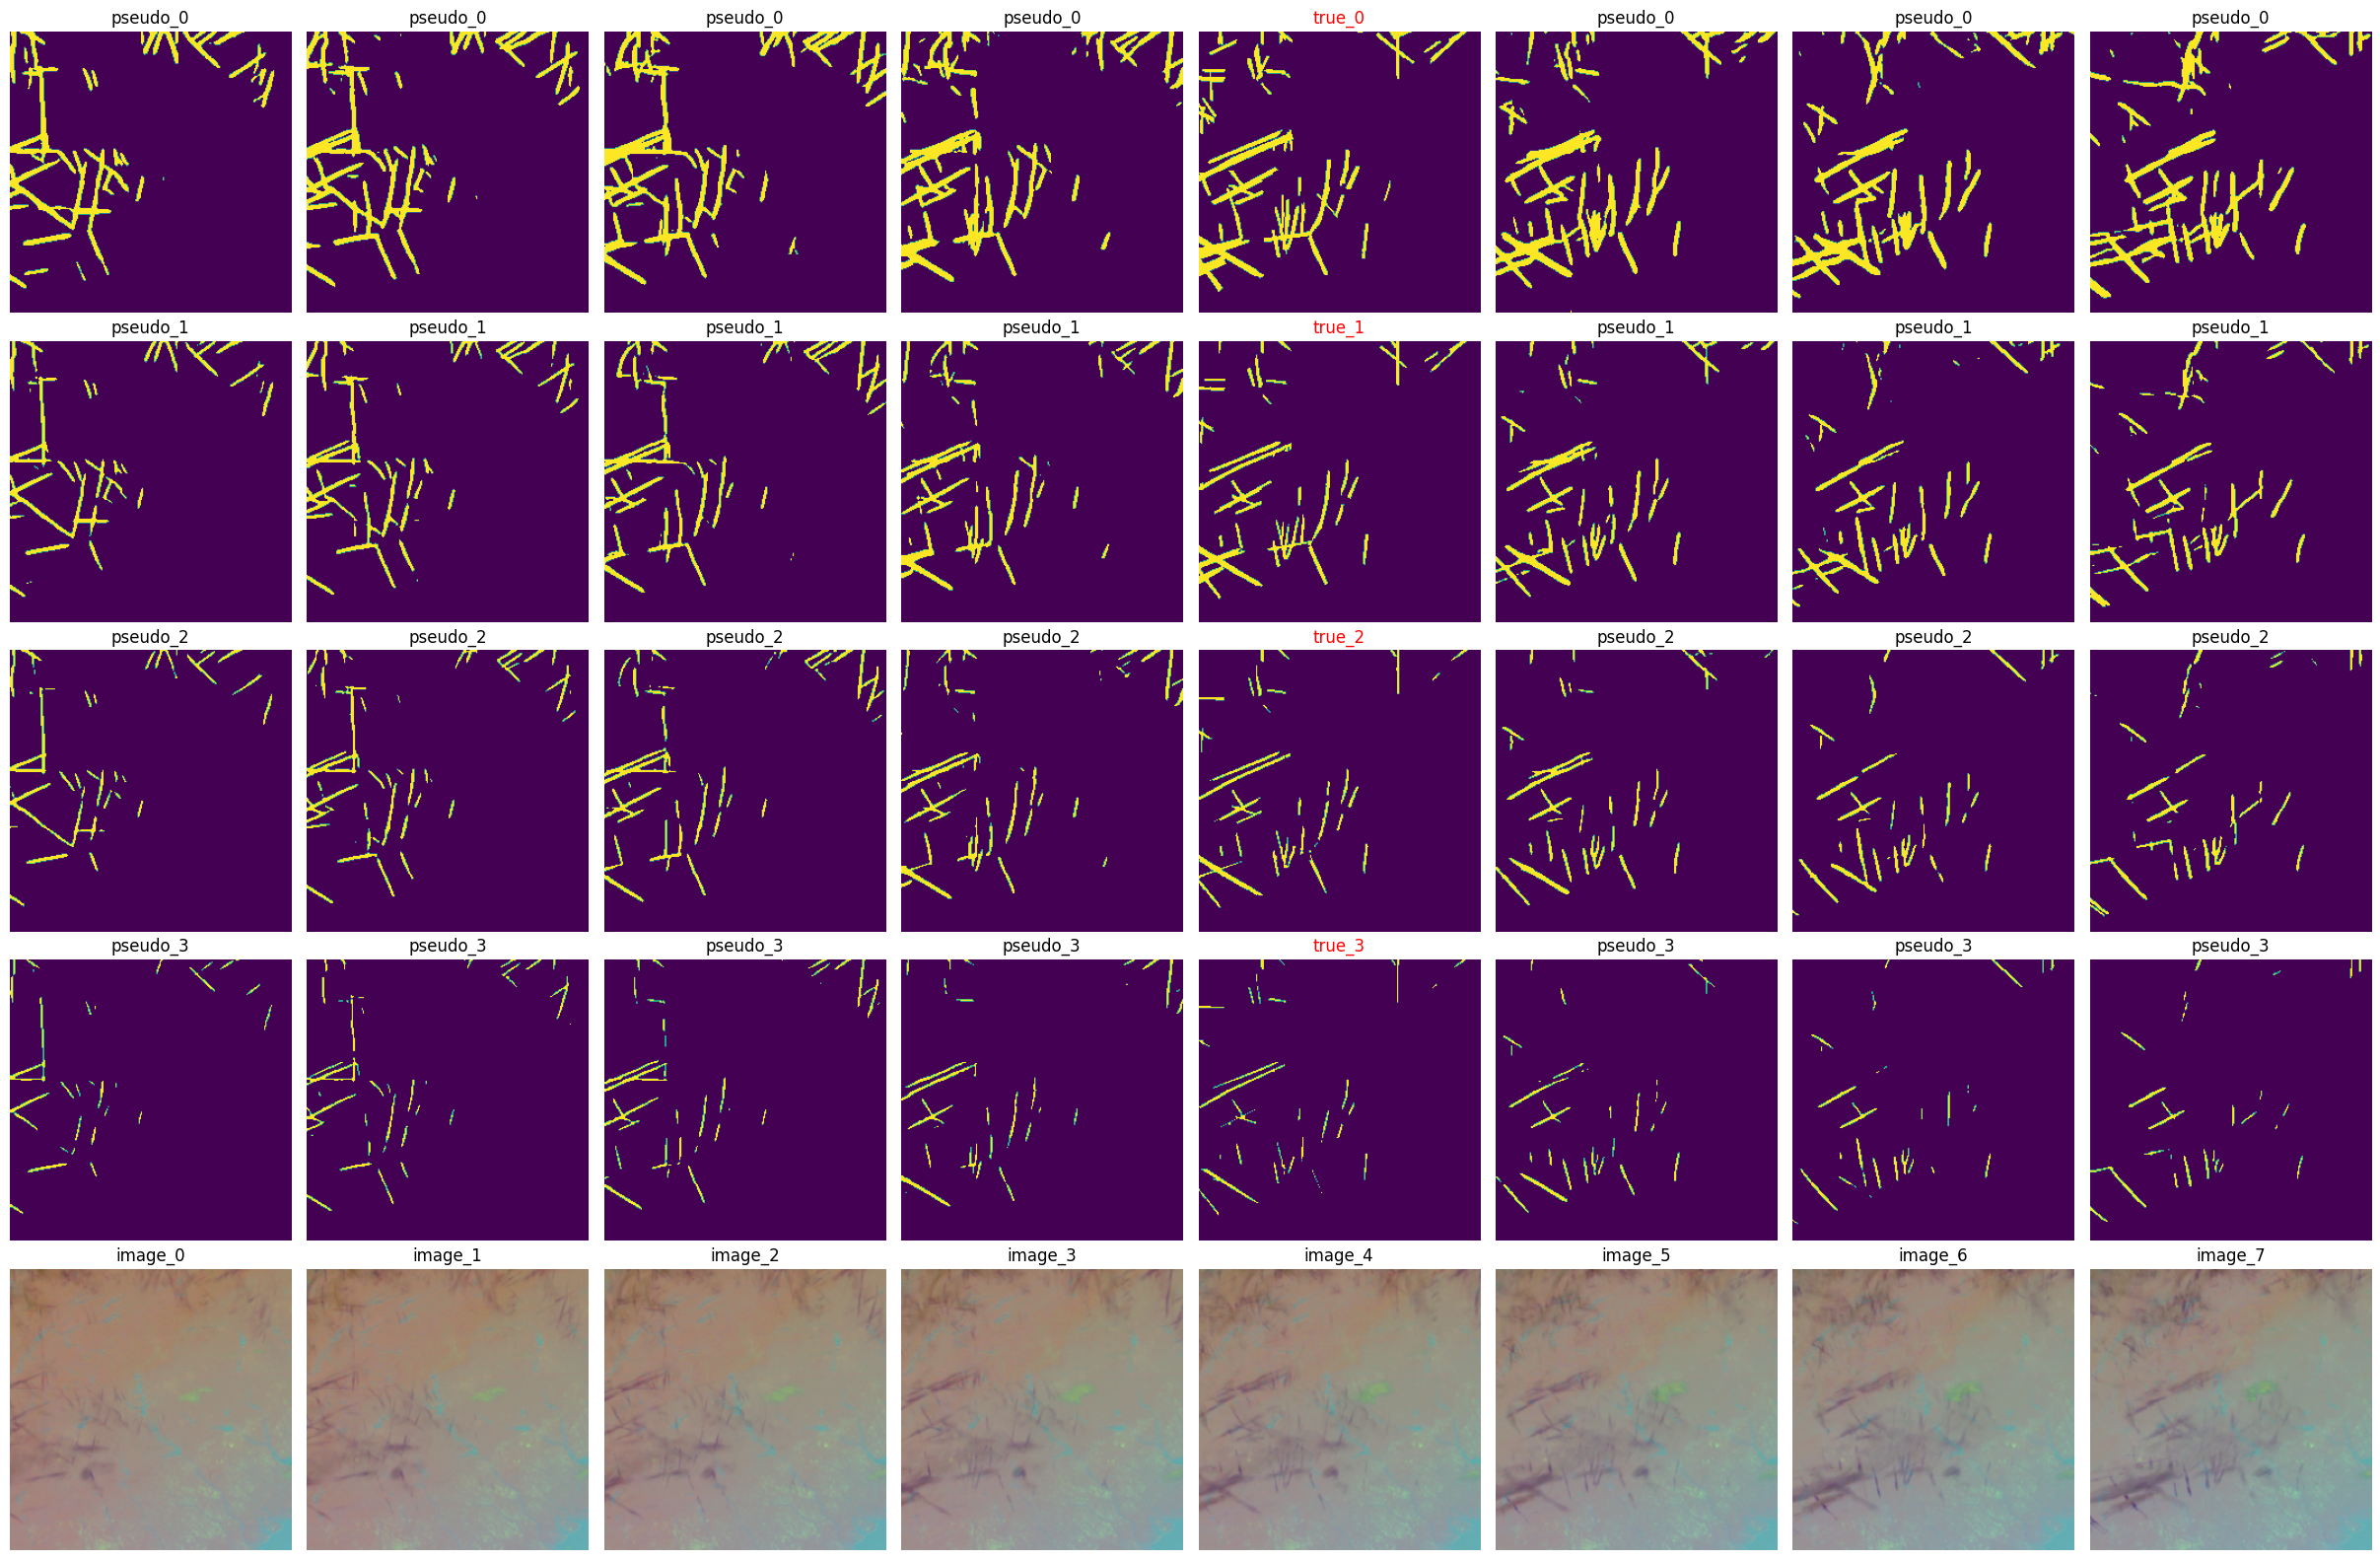

In [5]:
i = 328
tmp = train_df[train_df["record_id"] == record_ids[i]].reset_index()
fig, ax = plt.subplots(5, 8, figsize=(35, 20))
fig.subplots_adjust(wspace=-0.5, hspace=0.1)
for time in range(8):
    for label_n in range(4):
        ax[label_n][time].imshow(np.load(tmp["label_path"][time]).astype("float32")[:, :, label_n])
        ax[label_n][time].axis("off")
        ax[label_n][time].set_title(f"pseudo_{label_n}")
        if time == 4:
            ax[label_n][time].set_title(f"true_{label_n}", color='red')
    ax[4][time].imshow(np.load(tmp["image_path"][time]).astype("float32"))
    ax[4][time].axis("off")
    ax[4][time].set_title(f"image_{time}")


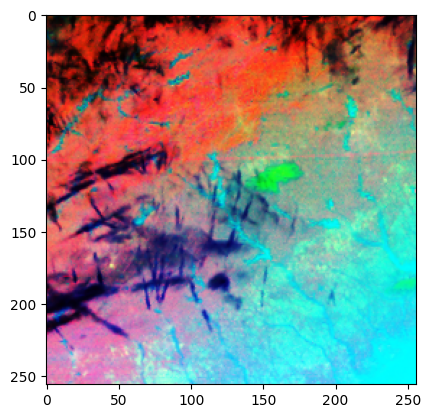

In [6]:
tmp_ = np.load(tmp["image_path"][4]).astype("float32")
equ0 = cv2.equalizeHist((tmp_[:, :, 0]*256).astype("uint8"))
equ1 = cv2.equalizeHist((tmp_[:, :, 1]*256).astype("uint8"))
equ2 = cv2.equalizeHist((tmp_[:, :, 2]*256).astype("uint8"))
equ = np.stack([equ0, equ1, equ2], axis=2)
plt.figure()
plt.imshow(equ)

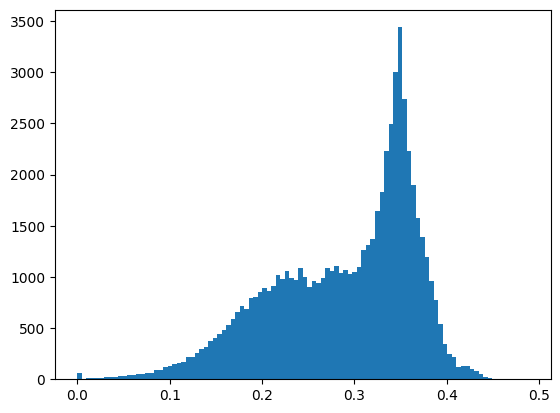

In [164]:
plt.hist(tmp_[:,:,0].flatten(), bins=100);